<B>Link to dataset >></B> https://www.kaggle.com/datasets/kaggle/sf-salaries?datasetId=14&sortBy=voteCount&select=Salaries.csv

<B>Import libiraries >>

In [167]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

<B>Import Data >>

In [168]:
df= pd.read_csv("C:\\Users\\20100\\Desktop\\data science\\data analysis\\projects\\SF Salaries\\Salaries.csv",
               low_memory= False)
df.head()

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.0,400184.25,NaN,567595.43,567595.43,2011,NaN,San Francisco,NaN
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,NaN,538909.28,538909.28,2011,NaN,San Francisco,NaN
2,3,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.6,NaN,335279.91,335279.91,2011,NaN,San Francisco,NaN
3,4,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916.0,56120.71,198306.9,NaN,332343.61,332343.61,2011,NaN,San Francisco,NaN
4,5,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.6,9737.0,182234.59,NaN,326373.19,326373.19,2011,NaN,San Francisco,NaN


<B>EDA >>

In [169]:
df['JobTitle'].nunique()

2159

In [170]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148654 entries, 0 to 148653
Data columns (total 13 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Id                148654 non-null  int64  
 1   EmployeeName      148654 non-null  object 
 2   JobTitle          148654 non-null  object 
 3   BasePay           148049 non-null  object 
 4   OvertimePay       148654 non-null  object 
 5   OtherPay          148654 non-null  object 
 6   Benefits          112495 non-null  object 
 7   TotalPay          148654 non-null  float64
 8   TotalPayBenefits  148654 non-null  float64
 9   Year              148654 non-null  int64  
 10  Notes             0 non-null       float64
 11  Agency            148654 non-null  object 
 12  Status            38119 non-null   object 
dtypes: float64(3), int64(2), object(8)
memory usage: 14.7+ MB


<br>we need to change data type from str to float64 ,that's for applying statistics on these columns

In [171]:
'''but if we change data type ,it will give error becouse there are rows
   contain this value 'Not Provided' in these columns
   ,so we will replace it with nan values'''
df = df.replace('Not Provided', np.nan)

df = df.astype({
    'BasePay': float,
    'OvertimePay': float,
    'OtherPay': float,
    'Benefits': float,
    'TotalPay': float,
    'TotalPayBenefits': float
})

df.dtypes

Id                    int64
EmployeeName         object
JobTitle             object
BasePay             float64
OvertimePay         float64
OtherPay            float64
Benefits            float64
TotalPay            float64
TotalPayBenefits    float64
Year                  int64
Notes               float64
Agency               object
Status               object
dtype: object

In [172]:
df.describe()

,Id,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes
count,148654.000000,148045.000000,148650.000000,148650.000000,112491.000000,148654.000000,148654.000000,148654.000000,0.0
mean,74327.500000,66325.448841,5066.059886,3648.767297,25007.893151,74768.321972,93692.554811,2012.522643,NaN
std,42912.857795,42764.635495,11454.380559,8056.601866,15402.215858,50517.005274,62793.533483,1.117538,NaN
min,1.000000,-166.010000,-0.010000,-7058.590000,-33.890000,-618.130000,-618.130000,2011.000000,NaN
25%,37164.250000,33588.200000,0.000000,0.000000,11535.395000,36168.995000,44065.650000,2012.000000,NaN
50%,74327.500000,65007.450000,0.000000,811.270000,28628.620000,71426.610000,92404.090000,2013.000000,NaN
75%,111490.750000,94691.050000,4658.175000,4236.065000,35566.855000,105839.135000,132876.450000,2014.000000,NaN
max,148654.000000,319275.010000,245131.880000,400184.250000,96570.660000,567595.430000,567595.430000,2014.000000,NaN


<br><i>what is the average BasePay ??

In [173]:
df['BasePay'].mean()

66325.44884050643

<br><i>what is the highest amount of the OvertimePay ??

In [174]:
df['OvertimePay'].max()

245131.88

<br><i>what is the TotalPay of ALBERT PARDINI (inclduding benefits)??

In [175]:
df[df['EmployeeName'] == 'ALBERT PARDINI']['TotalPayBenefits']

2    335279.91
Name: TotalPayBenefits, dtype: float64

<br><i>what is the name of the highest and lowest paid person??

In [176]:
df[df['TotalPayBenefits']==df['TotalPayBenefits'].max()]['EmployeeName']

0    NATHANIEL FORD
Name: EmployeeName, dtype: object

In [177]:
df[df['TotalPayBenefits']==df['TotalPayBenefits'].min()]['EmployeeName']

148653    Joe Lopez
Name: EmployeeName, dtype: object

In [178]:
df[df['TotalPayBenefits']==df['TotalPayBenefits'].min()]

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
148653,148654,Joe Lopez,"Counselor, Log Cabin Ranch",0.0,0.0,-618.13,0.0,-618.13,-618.13,2014,NaN,San Francisco,PT


In [179]:
#we notic that there is employees who do not take a salary and owe to the company
#we will count their number
Owe_emp = df.loc[df['TotalPayBenefits'] <= 0, 'TotalPayBenefits'].count()
print(Owe_emp)

34


<br><i>what was the avarage of the BasePay of all the employees per Year?? 

<br><i>what was the avarage of the BasePay of all the employees per Year?? 

In [180]:
df.groupby('Year')['BasePay'].mean().sort_values()

Year
2011    63595.956517
2012    65436.406857
2014    66564.421924
2013    69630.030216
Name: BasePay, dtype: float64

<br><i>what are the most popular jobs?? 

In [181]:
df['JobTitle'].value_counts().head(5)

Transit Operator                7036
Special Nurse                   4389
Registered Nurse                3736
Public Svc Aide-Public Works    2518
Police Officer 3                2421
Name: JobTitle, dtype: int64

<br><i>How many job titles were represented by only 1 person in 2013?? 

In [182]:
(df[df['Year'] == 2013]['JobTitle'].value_counts()==1).sum()

202

<br><i>How many employees have the word Chief in their job title?? 

In [183]:
df['JobTitle'].str.lower().str.contains('chief').sum()

627

<br><i>Is there is a correlation between (lenght of the job title string) and (salary)??

In [184]:
df['num_titles']= df['JobTitle'].apply(len)  
#apply fun is very useful when you want to perform functions and calcs on rows.
df['num_titles']

0         46
1         31
2         31
3         36
4         44
          ..
148649     9
148650    12
148651    12
148652    12
148653    26
Name: num_titles, Length: 148654, dtype: int64

In [185]:
df[['num_titles','TotalPayBenefits']].corr()

,num_titles,TotalPayBenefits
num_titles,1.000000,-0.036878
TotalPayBenefits,-0.036878,1.000000


> there is no correlatin

<br><i>what is the amount of increase in number of jobs in each year??

In [186]:
job_counts = df.groupby('Year')['Id'].count()

In [187]:
job_increase = job_counts.pct_change()
print(job_increase)

Year
2011         NaN
2012    0.016787
2013    0.022847
2014    0.013748
Name: Id, dtype: float64


fig, ax = plt.subplots()

ax.bar(job_counts.index, job_counts.values)
ax.set_ylabel('Number of Jobs')

ax2 = ax.twinx()
ax2.set_ylabel('Percentage Increase')

ax.set_title('Number of Jobs and Percentage Increase by Year')

plt.show()


#### visualizing the 5 number summary of TotalPayBenefits

Text(0.5, 1.0, '5 number summary of TotalPayBenefits')

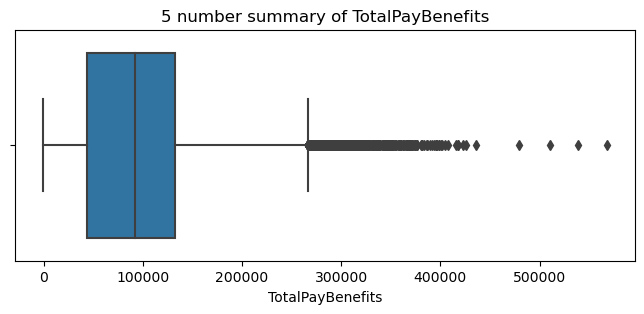

In [188]:
plt.figure(figsize=(8,3))
sns.boxplot(x=df['TotalPayBenefits']).set_title("5 number summary of TotalPayBenefits")

### Insight:
The most of employees receive a wage with approximately 100000 per year,
The number of employees that receive a wage with above 400000 is very small.

<br><i>so, what is the title of these people who take more than 400000??

In [189]:
high_earners = df[df['TotalPayBenefits'] > 400000]
high_earners['JobTitle'].unique()

array(['GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY',
       'CAPTAIN III (POLICE DEPARTMENT)', 'Lieutenant, Fire Suppression',
       'Chief of Police', 'Chief, Fire Department',
       'Battalion Chief, Fire Suppress', 'Asst Med Examiner',
       'Deputy Chief 3', 'Chief Investment Officer', 'Dept Head V'],
      dtype=object)